## Restaurant revenue 

#### Problem Statement

predict and analyze the revenues of 137 restaurants depending on various features found in the dataframe

- Id : Restaurant id. 
- Open Date : opening date for a restaurant
- City : City that the restaurant is in. Note that there are unicode in the names. 
- City Group: Type of the city. Big cities, or Other. 
- Type: Type of the restaurant. 
   - FC: Food Court 
   - IL: Inline 
   - DT: Drive Thru 
   - MB: Mobile
- P1, P2 - P37: There are three categories . Demographic data . Real estate data . Commercial data .
- Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis.  

metric ---> RMSE

In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics




### Data reading:

In [2]:
# reading data

train=pd.read_csv('./restaurant-revenue-prediction/train.csv')
test=pd.read_csv('./restaurant-revenue-prediction/test.csv')


In [3]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
train.shape

(137, 43)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [6]:
train['Open Date']= pd.to_datetime(train['Open Date'])


### Data analysis:

In [7]:
train_time= train.copy()

In [8]:
train_time.set_index('Open Date',inplace=True)

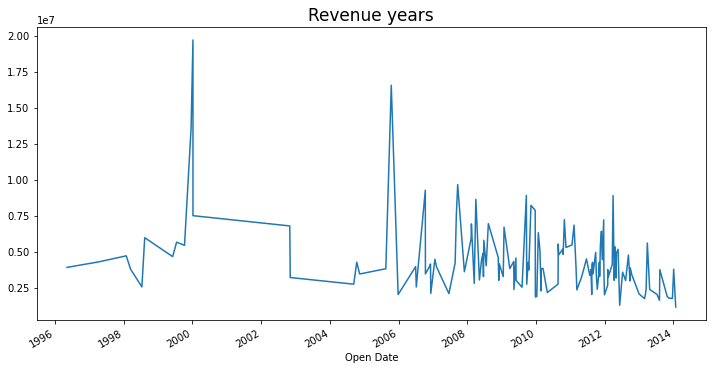

In [9]:
train_time['revenue'].plot(figsize=(12,6));
plt.title('Revenue years',fontsize=17);

In [10]:
train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

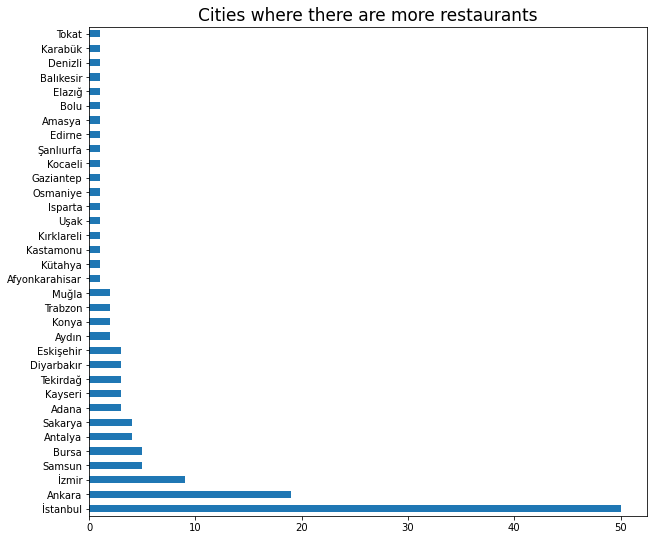

In [11]:
plt.figure(figsize=(10, 9))
train['City'].value_counts().plot(kind='barh');
plt.title('Cities where there are more restaurants',fontsize=17);

<Figure size 720x648 with 0 Axes>

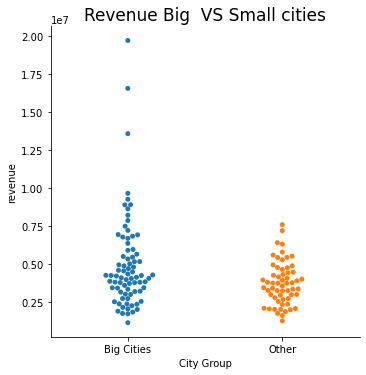

In [12]:
plt.figure(figsize=(10, 9));
sns.catplot(x='City Group', y='revenue', kind='swarm', data=train);
plt.title('Revenue Big  VS Small cities',fontsize=17);

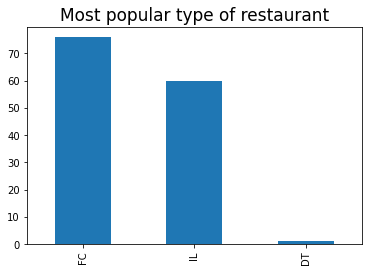

In [13]:
train["Type"].value_counts().plot(kind='bar');
plt.title('Most popular type of restaurant',fontsize=17);

<Figure size 720x648 with 0 Axes>

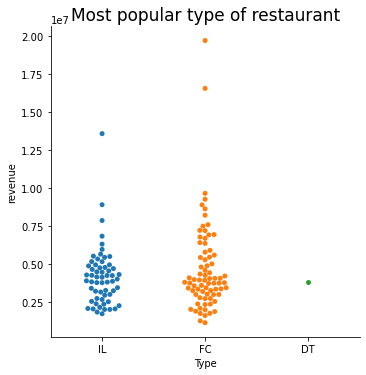

In [14]:
plt.figure(figsize=(10, 9))
sns.catplot(x='Type', y='revenue', kind='swarm', data=train);
plt.title('Most popular type of restaurant',fontsize=17);

###


In [16]:
# selecting revenue as a target
y= train['revenue']

#dropping target from the train dataframe
train.drop('revenue',axis=1,inplace=True)
train.shape

(137, 42)

In [17]:
# creating dummies variables for city group and type
train=pd.get_dummies(train,columns=['City Group','Type'],drop_first=True)
test=pd.get_dummies(test,columns=['City Group','Type'],drop_first=True)

# list of cloumns
train.columns

Index(['Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'City Group_Other', 'Type_FC', 'Type_IL'],
      dtype='object')

In [18]:
# selecting X for the model
X= train.drop(['Id','Open Date', 'City'],axis=1)
features = X.columns
X.shape

(137, 40)

### Models

In [19]:
# Instantiate our PolynomialFeatures 
poly = PolynomialFeatures(include_bias = False, degree=2, interaction_only=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X)
X_overfit.shape

(137, 860)

In [20]:
#split our data

X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, test_size=.33, random_state=42)

In [21]:
# scale data
ss = StandardScaler()

X_train= ss.fit_transform(X_train) 

X_test= ss.transform(X_test)

### Linear Regression

In [22]:
#Instantiate our model.
linreg = LinearRegression()
linreg.fit(X_train ,y_train)

#create predictions
train_preds = linreg.predict(X_train)
test_preds = linreg.predict(X_test)

# RMSE
print(f'RMSE training: {metrics.mean_squared_error(y_train, train_preds, squared = False)}')
print(f'RMSE testing: {metrics.mean_squared_error(y_test, test_preds, squared = False)}')

RMSE training: 4.003059365125201e-08
RMSE testing: 17675665.061205473


### Rigde 

In [23]:
#Instantiate
ridge_model = Ridge(alpha=5)
ridge_model.fit(X_train ,y_train)

#create predictions
train_preds = ridge_model.predict(X_train)
test_preds = ridge_model.predict(X_test)
# RMSE
print(f'RMSE training: {metrics.mean_squared_error(y_train, train_preds, squared = False)}')
print(f'RMSE testing: {metrics.mean_squared_error(y_test, test_preds, squared = False)}')

RMSE training: 1109581.7850351275
RMSE testing: 7033187.887125345


### knn Regressor

In [24]:
knn_params = {
    'n_neighbors': range(1, 51, 5),
    'weights': ['uniform', 'distance']
}

In [25]:
knn_gridsearch = GridSearchCV(KNeighborsRegressor(),
                             knn_params, 
                             cv = 5, 
                             verbose = 1)
knn_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 51, 5),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [26]:
knn_gridsearch.best_params_

{'n_neighbors': 21, 'weights': 'uniform'}

In [27]:
knn = KNeighborsRegressor(n_neighbors= 21,weights='uniform')
knn.fit(X_train,y_train)

#create predictions
train_preds = knn.predict(X_train)
test_preds = knn.predict(X_test)
# RMSE
print(f'RMSE training: {metrics.mean_squared_error(y_train, train_preds, squared = False)}')
print(f'RMSE testing: {metrics.mean_squared_error(y_test, test_preds, squared = False)}')

RMSE training: 2240370.5965215294
RMSE testing: 2858291.865605364


### Random Forest

In [28]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'random_state': [42]
}

In [29]:
rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             rf_params, 
                             cv = 5, 
                             verbose = 1)
rf_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200],
                         'random_state': [42]},
             verbose=1)

In [30]:
rf_gridsearch.best_params_

{'max_depth': 5, 'n_estimators': 100, 'random_state': 42}

In [31]:
rf = RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42)
rf.fit(X_train,y_train)

train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

# squared=False gives us the square root
print(f'RMSE training: {metrics.mean_squared_error(y_train, train_preds, squared = False)}')
print(f'RMSE testing: {metrics.mean_squared_error(y_test, test_preds, squared = False)}')

RMSE training: 1124666.6395238233
RMSE testing: 2891690.882396077


### findings 

|               | Linear Regression     | Rigde      | knn Regressor | Random Forest |
|---------------|-----------------------|------------|---------------|---------------|
| RMSE training | 4.003059365125201e-08 | 1109581.78 | 2240370.59    | 1124666.63    |
| RMSE testing  | 17675665.06           | 7033187.88 | 2858291.86    | 2891690.88    |

Comparing the models we can say that the Linear Regession model was the one with the lowest performance, to try to improve this model we could use the entire dataset for training and try to make a type of feature selection.
The model that I would personally use would be the Ridge model because both the training and testing datasets were very close and also have the lowest values. to try to improve this model I would try to apply the same procedures for the Linear Regression model

### kaggle process 

In [33]:
poly_test = PolynomialFeatures(include_bias = False, degree=2, interaction_only=False)
X_overfit_test = poly.fit_transform(test[features])



In [34]:
X_overfit_test.shape

(100000, 860)

In [37]:
kaggle_preds = knn.predict(X_overfit_test)

In [38]:
test['prediction'] = kaggle_preds

In [39]:
test_kaggle=test[['Id','prediction']]

In [40]:
test_kaggle.head()

,Id,prediction
0,0,5.247229e+06
1,1,4.494984e+06
2,2,5.238823e+06
3,3,4.894730e+06
4,4,5.295679e+06


In [41]:
test_kaggle.to_csv('submission.csv', index=False)